In [38]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns


In [39]:
f = open('pvalues.savepkl','rb')
zstats = pickle.load(f)
pvalues = pickle.load(f)
f.close()

In [40]:
len(pvalues)

2847

In [41]:
def prune_dictionary(alpha, zstats, pvalues):
    keys_to_remove = []
    for key, val in pvalues.items():
        if pvalues[key] > alpha or zstats[key] > 0 or key == '':  # drop z>0 to keep more deaths in 2009 
            keys_to_remove.append(key)
    new_zstats = zstats.copy()
    new_pvalues = pvalues.copy()
    for key in keys_to_remove:
        del new_zstats[key]
        del new_pvalues[key]
    return new_zstats, new_pvalues

In [42]:
z, p = prune_dictionary(.00001/2846, zstats, pvalues)

In [43]:
len(z)

104

In [44]:
def prune_away_sigs(alpha, zstats, pvalues):
    keys_to_remove = []
    for key, val in pvalues.items():
        if pvalues[key] < alpha or key == '':  # drop z>0 to keep more deaths in 2009 
            keys_to_remove.append(key)
    new_zstats = zstats.copy()
    new_pvalues = pvalues.copy()
    for key in keys_to_remove:
        del new_zstats[key]
        del new_pvalues[key]
    return new_zstats, new_pvalues

In [45]:
z_insig, p_insig = prune_away_sigs(.00001/2846, zstats, pvalues)

In [46]:
len(z_insig)

2604

Rank by greatest Cohen's h.

In [47]:
f = open("cohens_h.savepkl", "rb")
cohens_h = pickle.load(f)
f.close()

In [48]:
def prune_by_dict(dict_w_keys,dict_w_values):
    new_dict = {key: dict_w_values[key] for key in dict_w_keys.keys()}
    return new_dict    

In [49]:
h = prune_by_dict(p, cohens_h)

In [50]:
len(h)

104

In [51]:
dh = pd.Series(h).sort_values(ascending=False)

In [52]:
dh.head(10)

J440    0.019504
N039    0.007223
J441    0.005746
X45     0.004851
R628    0.004641
F179    0.004545
J960    0.004000
T519    0.003984
T510    0.002898
R53     0.002732
dtype: float64

In [53]:
dh.mean()

0.001439559728666582

In [54]:
h_insig = prune_by_dict(p_insig, cohens_h)

In [55]:
len(h_insig)

2604

In [56]:
dh_insig = pd.Series(h_insig).sort_values(ascending=False)

In [57]:
dh_insig.head()

I201    0.000493
F319    0.000480
K701    0.000479
I340    0.000478
J101    0.000477
dtype: float64

In [58]:
pvalues['Y24']

0.9995558706656231

In [59]:
f = open("../etl/k6.savepkl", "rb")
k6 = pickle.load(f)
f.close()
f = open("../etl/k9.savepkl", "rb")
k9 = pickle.load(f)
f.close()

In [60]:
k6prune = prune_by_dict(p, k6)
k9prune = prune_by_dict(p, k9)

In [61]:
len(k6prune)

104

In [62]:
len(k9prune)

104

In [63]:
dk = pd.DataFrame({'k6': k6prune, 'k9':k9prune, 'cohen': dh}).sort_values('cohen', ascending=False)

In [64]:
dk.head(10)

,k6,k9,cohen
J440,326,35765,0.019504
N039,6183,20445,0.007223
J441,196,4163,0.005746
X45,2222,8151,0.004851
R628,46566,67312,0.004641
F179,164878,203871,0.004545
J960,20814,32876,0.004000
T519,1141,4781,0.003984
T510,2049,5081,0.002898
R53,14483,21302,0.002732


In [67]:
dk.head(10).index

Index(['J440', 'N039', 'J441', 'X45', 'R628', 'F179', 'J960', 'T519', 'T510',
       'R53'],
      dtype='object')

In [84]:
n = 6
x6 = 2005.7
x9 = 2009.1
y6  = dk.head(n)['k6']
y9  = dk.head(n)['k9']
tx = pd.Series(dk.head(n).index)

    

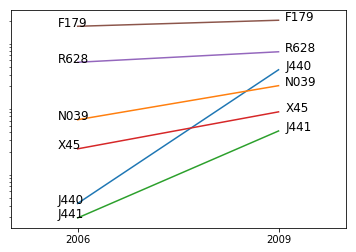

In [89]:
plt.plot([2006, 2009],[dk.head(n)['k6'], dk.head(n)['k9']])
plt.yscale('log')
plt.xticks([2006, 2009])
#plt.legend(dk.head(10).index, loc='lower right')
for i in range(n):
    plt.text(x6, y6[i], tx[i], fontsize=12)
    plt.text(x9, y9[i], tx[i], fontsize=12)
plt.yticks([])# To remove the y-axis
plt.xlim((2005,2010))
plt.savefig('top_causes_slopegraph.pdf')


## The link to the presention is https://prezi.com/view/fL4qT4fdPz2KdBWE1euK/